# Multiple Linear Regression

## from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset - Students

In [3]:
data_df = pd.read_csv('student.csv')
data_df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
data_df.shape

(1000, 3)

## Analysing the Dataset

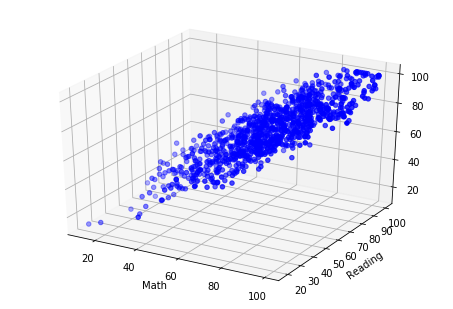

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_df[data_df.columns[0]], data_df[data_df.columns[1]], data_df[data_df.columns[2]], c='b')
plt.xlabel(data_df.columns[0])
plt.ylabel(data_df.columns[1])
plt.show()

## Dependent and Independent Variable

In [29]:
x = np.array([np.ones(data_df.shape[0]), data_df[data_df.columns[0]], data_df[data_df.columns[1]]]).T
x[:5]

array([[ 1., 48., 68.],
       [ 1., 62., 81.],
       [ 1., 79., 80.],
       [ 1., 76., 83.],
       [ 1., 59., 64.]])

In [32]:
y = np.array(data_df[data_df.columns[2]])
y[:5]

array([63, 72, 78, 79, 62], dtype=int64)

In [34]:
alpha = 0.0001
B = np.array([0, 0, 0])
B

array([0, 0, 0])

## Modeling Multiple Regression Model

In [38]:
def cost_function(x, y, B):
    return np.sum((x.dot(B) - y) ** 2) / (2 * len(y))

intial_cost = cost_function(x, y, B)
print(intial_cost)

2470.11


In [41]:
def gradient_decent(x, y, B, alpha, iterations):
    cost_history = [0] * iterations
    
    for i in range(iterations):
        h = x.dot(B)
        loss = h - y
        gradient = x.T.dot(loss)/len(y)
        
        B = B - alpha * gradient
        
        cost_history[i] = cost_function(x, y, B)
    return B, cost_history

newB, cost_history = gradient_decent(x, y, B, alpha, 1000)

print(newB, cost_history[-1])

[0.00274048 0.09441056 0.89189383] 10.50004321886426


### Plotting the gradient Decent 

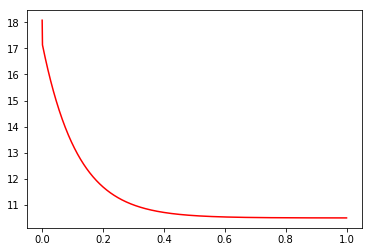

In [45]:
x1 = np.linspace(0, 1, 1000)
plt.plot(x1, cost_history, c='r')
plt.show()